In [1]:
# Analyzing the health care expenditure data for the countries with top 50 child mortality rates.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [3]:
# Read the data
hce_data = pd.read_excel("GlobalHealthExpenditures_PerCapita.xls")

# This data is in the form of healthcare expenditure per capita in US dollars.
print(hce_data.columns)
hce_data.head()

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')


,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,15.803164,15.803164,15.803164,17.035744,20.412764,23.890501,...,50.853474,51.440262,55.034630,59.008934,58.906528,60.188671,65.706024,49.842609,NaN,NaN
2,Angola,AGO,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,12.998967,28.918121,29.049364,34.875187,49.810741,54.260777,...,122.107231,122.185585,143.606873,131.647659,108.582939,95.124977,114.334602,87.616768,NaN,NaN
3,Albania,ALB,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,80.616951,89.580734,96.271118,125.987976,156.568176,165.265335,...,211.075516,213.719742,236.957962,251.358261,192.885132,202.013321,226.280670,274.914093,NaN,NaN
4,Andorra,AND,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,1292.039429,1319.906006,1508.520752,1812.315796,2033.003540,2301.593506,...,2567.525391,2342.568359,2432.782715,2529.089844,2246.254395,2361.217529,2567.423828,2821.801270,NaN,NaN


In [4]:
# Drop columns with all NA values
hce_data = hce_data.drop(['2016', '2017', '2018', '2019', '2020', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
print(hce_data.columns)

# Drop all rows where any data is missing
hce_data = hce_data.dropna()

print(hce_data.columns)
hce_data.head()

Index(['Country Name', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')
Index(['Country Name', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')


,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,Afghanistan,15.803164,15.803164,15.803164,17.035744,20.412764,23.890501,27.836571,31.271839,38.102661,41.722744,44.990532,50.853474,51.440262,55.034630,59.008934,58.906528
2,Angola,12.998967,28.918121,29.049364,34.875187,49.810741,54.260777,69.812302,92.860306,135.605820,119.996284,96.697014,122.107231,122.185585,143.606873,131.647659,108.582939
3,Albania,80.616951,89.580734,96.271118,125.987976,156.568176,165.265335,174.530243,222.303665,220.464249,186.442810,192.003220,211.075516,213.719742,236.957962,251.358261,192.885132
4,Andorra,1292.039429,1319.906006,1508.520752,1812.315796,2033.003540,2301.593506,2158.875732,2392.820312,2774.493408,2687.855957,2642.165527,2567.525391,2342.568359,2432.782715,2529.089844,2246.254395
5,Arab World,113.811519,117.088829,116.421658,113.314795,124.084017,137.945955,158.918698,186.140626,217.181002,240.726499,245.611123,283.216093,306.166783,340.070541,367.349266,350.125407


In [5]:
countries_in_focus = ['India', 'Nigeria', 'Pakistan', 'China', 'Democratic Republic of the Congo', 'Ethiopia',
 'Bangladesh', 'Indonesia', 'United Republic of Tanzania', 'Angola', 'Uganda', 'Mozambique', 'Afghanistan',
 'Niger', 'Sudan', 'Mali', 'Kenya', 'Côte d\'Ivoire', 'Cameroon', 'Somalia', 'Burkina Faso', 'Chad', 'Philippines',
 'Myanmar', 'South Africa', 'Brazil', 'Egypt', 'Ghana', 'Malawi', 'Yemen', 'Zambia', 'Madagascar', 'Guinea',
 'Mexico', 'South Sudan', 'Sierra Leone', 'Benin', 'Zimbabwe', 'Iraq', 'Nepal', 'Senegal', 'Viet Nam', 'Burundi',
 'United States of America', 'Turkey', 'Rwanda', 'Iran (Islamic Republic of)', 'Central African Republic',
 'Haiti', 'Uzbekistan']

countries_in_focus = sorted(countries_in_focus)

In [6]:
cn = hce_data['Country Name']

def intersection(l1, l2):
    return list(set(l1) & set(l2))

common_countries = sorted(intersection(countries_in_focus, cn))
print(len(common_countries))
print(common_countries)

47
['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Brazil', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'China', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Egypt', 'Ethiopia', 'Ghana', 'Guinea', 'Haiti', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Kenya', 'Madagascar', 'Malawi', 'Mali', 'Mexico', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Turkey', 'Uganda', 'United Republic of Tanzania', 'United States of America', 'Uzbekistan', 'Viet Nam', 'Yemen', 'Zambia']


In [7]:
hce_data_filtered = hce_data[hce_data['Country Name'].isin(common_countries)]
hce_data_filtered.shape

(47, 17)

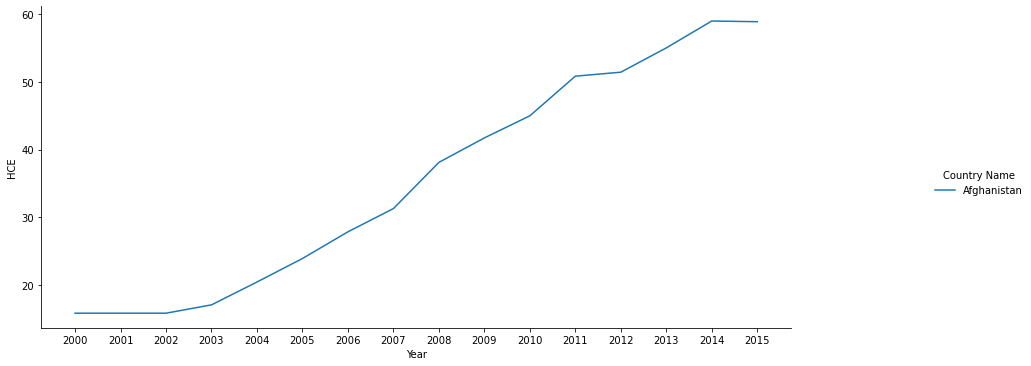

In [8]:
test = hce_data_filtered[hce_data_filtered['Country Name'] == 'Afghanistan']
test = test.melt(id_vars = ['Country Name'], var_name = 'Year', value_name = 'HCE')

g = sns.relplot(x = 'Year', y = 'HCE', hue = "Country Name", kind = "line", data = test)
g.fig.set_size_inches(15,5)
plt.show()

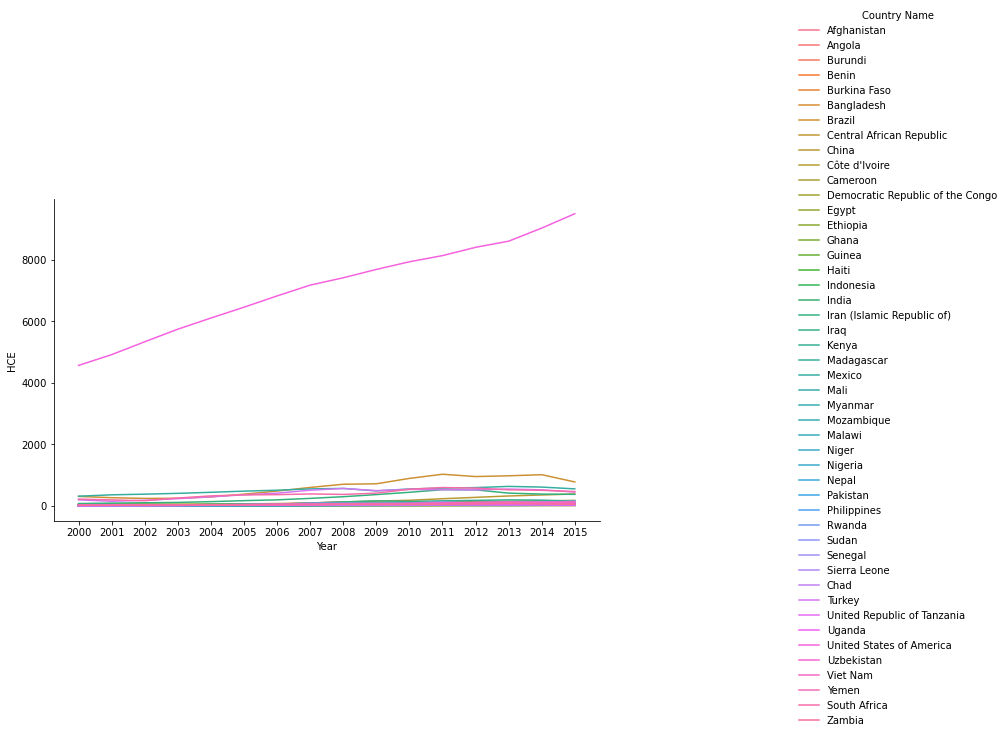

In [9]:
melted_hce_data_filtered = hce_data_filtered.melt(id_vars = ['Country Name'], var_name = 'Year', value_name = 'HCE')
melted_hce_data_filtered

g = sns.relplot(x = 'Year', y = 'HCE', hue = "Country Name", kind = "line", data = melted_hce_data_filtered)
g.fig.set_size_inches(15,5)
plt.show()

In [10]:
import numpy as np
import pandas as pd

child_mortality = pd.read_excel(r'wholeworld_cmi.xlsx')
df_child_mortality = pd.DataFrame(data = child_mortality)
df_child_mortality.head(10)

,Location,Dim2,Indicator,Period,Dim1,Tooltip,IndicatorCode,FactValueForMeasure,FactValueString,FactValueUoM,...,FactValueNumericPrefix,DateModified,ClassBreakId,LegendLabelText,LegendColorForText,LegendColorMaxNumeric,LegendColorMinNumeric,BasemapURL,LabelMapURL,LabelMapLanguage
0,Afghanistan,HIV/AIDS,Number of deaths,2017,0-27 days,0.17,MORT_100,0.17,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,HIV/AIDS,Number of deaths,2017,1-59 months,16.83,MORT_100,16.83,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,HIV/AIDS,Number of deaths,2017,0-4 years,17.00,MORT_100,17.00,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,HIV/AIDS,Number of deaths,2016,0-27 days,0.17,MORT_100,0.17,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,HIV/AIDS,Number of deaths,2016,1-59 months,16.83,MORT_100,16.83,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,HIV/AIDS,Number of deaths,2016,0-4 years,17.00,MORT_100,17.00,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,HIV/AIDS,Number of deaths,2015,0-27 days,0.17,MORT_100,0.17,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,HIV/AIDS,Number of deaths,2015,1-59 months,16.83,MORT_100,16.83,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,HIV/AIDS,Number of deaths,2015,0-4 years,17.00,MORT_100,17.00,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,HIV/AIDS,Number of deaths,2014,0-27 days,0.17,MORT_100,0.17,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Dropping the columns with redundant and NAN Values
df_child_mortality = df_child_mortality.drop(columns=['FactValueString','FactValueUoM','FactComments','DataSourceDimValueCode','Dim3ValueCode',
                                 'SlicingDimCode','SlicingDimValueCode','LanguageName',
                                 'FactValueNumericPrefix','DateModified','ClassBreakId','LegendLabelText','LegendColorForText', 
                                 'LegendColorMaxNumeric','LegendColorMinNumeric','BasemapURL','LabelMapURL','LabelMapLanguage',
                                 'IsLatestYear','LatestYearLabel','Dim2ValueCode','SpatialDimValueCode','LanguageOrder',
                                 'TimeDimValueCode','Dim1ValueCode','FactValueForMeasure','Indicator','IndicatorCode'])

df_child_mortality = df_child_mortality.drop(df_child_mortality.columns[5], axis=1) #Cleaning the unwanted column
df_child_mortality = df_child_mortality.rename(columns={"Dim2": "Reason", "Dim1": "AgeGroup", "Period": "Year","Tooltip" : "Deaths"}, errors="raise")

print(df_child_mortality.shape)
df_child_mortality.describe()

(147762, 6)


,Year,Deaths
count,147762.000000,147762.000000
mean,2008.486397,1830.014304
std,5.183150,11319.173549
min,2000.000000,0.000000
25%,2004.000000,0.028000
50%,2008.000000,24.320000
75%,2013.000000,477.400000
max,2017.000000,487137.000000


In [12]:
new_df = df_child_mortality

x = new_df.groupby("Location").sum()
x = x.sort_values(by='Deaths', ascending=False)

list_countries = x.index.tolist()
list_countries = list_countries[0:50]

In [13]:
dataset_final = new_df[new_df.Location.isin(list_countries)]
print(dataset_final)

           Location    Reason  Year     AgeGroup   Deaths SpaceTime
0       Afghanistan  HIV/AIDS  2017    0-27 days     0.17       AFG
1       Afghanistan  HIV/AIDS  2017  1-59 months    16.83       AFG
2       Afghanistan  HIV/AIDS  2017    0-4 years    17.00       AFG
3       Afghanistan  HIV/AIDS  2016    0-27 days     0.17       AFG
4       Afghanistan  HIV/AIDS  2016  1-59 months    16.83       AFG
...             ...       ...   ...          ...      ...       ...
147757     Zimbabwe  Injuries  2001  1-59 months  1030.00       ZWE
147758     Zimbabwe  Injuries  2001    0-4 years  1106.00       ZWE
147759     Zimbabwe  Injuries  2000    0-27 days    72.03       ZWE
147760     Zimbabwe  Injuries  2000  1-59 months   957.80       ZWE
147761     Zimbabwe  Injuries  2000    0-4 years  1030.00       ZWE

[38060 rows x 6 columns]


In [14]:
dataset_final.isna().sum()
dataset_final = dataset_final[(dataset_final.SpaceTime != "WBDCP_SSA")]

category_1 = dataset_final[dataset_final.AgeGroup == "0-27 days"].index.tolist()
category_2 = dataset_final[dataset_final.AgeGroup == "1-59 months"].index.tolist()
category_3 = dataset_final[dataset_final.AgeGroup == "0-4 years"].index.tolist()

dataset_final.loc[category_1, "Category"] = "1"
dataset_final.loc[category_2, "Category"] = "2"
dataset_final.loc[category_3, "Category"] = "3"

print(dataset_final)

           Location    Reason  Year     AgeGroup   Deaths SpaceTime Category
0       Afghanistan  HIV/AIDS  2017    0-27 days     0.17       AFG        1
1       Afghanistan  HIV/AIDS  2017  1-59 months    16.83       AFG        2
2       Afghanistan  HIV/AIDS  2017    0-4 years    17.00       AFG        3
3       Afghanistan  HIV/AIDS  2016    0-27 days     0.17       AFG        1
4       Afghanistan  HIV/AIDS  2016  1-59 months    16.83       AFG        2
...             ...       ...   ...          ...      ...       ...      ...
147757     Zimbabwe  Injuries  2001  1-59 months  1030.00       ZWE        2
147758     Zimbabwe  Injuries  2001    0-4 years  1106.00       ZWE        3
147759     Zimbabwe  Injuries  2000    0-27 days    72.03       ZWE        1
147760     Zimbabwe  Injuries  2000  1-59 months   957.80       ZWE        2
147761     Zimbabwe  Injuries  2000    0-4 years  1030.00       ZWE        3

[38060 rows x 7 columns]


In [15]:
listn = dataset_final.loc[dataset_final.Year >= 2016].index.to_list()
dataset_final = dataset_final.drop(listn)
(dataset_final.SpaceTime.unique())

array(['AFG', 'AGO', 'BGD', 'BEN', 'BRA', 'BFA', 'BDI', 'CMR', 'CAF',
       'TCD', 'CHN', 'CIV', 'COD', 'EGY', 'ETH', 'GHA', 'GIN', 'HTI',
       'IND', 'IDN', 'IRN', 'IRQ', 'KEN', 'MDG', 'MWI', 'MLI', 'MEX',
       'MOZ', 'MMR', 'NPL', 'NER', 'NGA', 'PAK', 'PHL', 'RWA', 'SEN',
       'SLE', 'SOM', 'ZAF', 'SSD', 'SDN', 'TUR', 'UGA', 'TZA', 'USA',
       'UZB', 'VNM', 'YEM', 'ZMB', 'ZWE'], dtype=object)

In [16]:
#Normalize the Data over the 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=Warning)


def normalize_yearwise_deaths_diseases(dataframe, new_df):
    for reason in dataframe.Reason.unique().tolist():
        temp_df = dataframe.loc[(dataframe.Reason == reason)]
        sum_count_years = temp_df["Deaths"].sum()
        temp_df["Deaths"] = temp_df["Deaths"]/sum_count_years
        temp_df["DeathsPercentage"] = np.multiply(temp_df["Deaths"],100)
        new_df = new_df.append(temp_df)
    
    sns.relplot(x="Year", y="Deaths",hue="Reason", style="Location",kind="line", data=new_df).set(title=new_df.iloc[0]["Location"] 
                                                                                        + ' : ' + new_df.iloc[0]["AgeGroup"])
    plt.show()
        
    return new_df

In [17]:
#Data Preprocessing for the Group 0-27 days

df_0_27_days = dataset_final.loc[(dataset_final.Category == '1')]
df_1_59_months = dataset_final.loc[(dataset_final.Category == '2')]
df_1_4_years = dataset_final.loc[(dataset_final.Category == '3')]

new_df_0_27_days = pd.DataFrame(data=df_0_27_days)
new_df_1_59_months = pd.DataFrame(data=df_1_59_months)
new_df_1_4_years = pd.DataFrame(data=df_1_4_years)

new_df_1_4_years

,Location,Reason,Year,AgeGroup,Deaths,SpaceTime,Category
8,Afghanistan,HIV/AIDS,2015,0-4 years,17.0,AFG,3
11,Afghanistan,HIV/AIDS,2014,0-4 years,17.0,AFG,3
14,Afghanistan,HIV/AIDS,2013,0-4 years,18.0,AFG,3
17,Afghanistan,HIV/AIDS,2012,0-4 years,18.0,AFG,3
20,Afghanistan,HIV/AIDS,2011,0-4 years,18.0,AFG,3
...,...,...,...,...,...,...,...
147749,Zimbabwe,Injuries,2004,0-4 years,1441.0,ZWE,3
147752,Zimbabwe,Injuries,2003,0-4 years,1313.0,ZWE,3
147755,Zimbabwe,Injuries,2002,0-4 years,1202.0,ZWE,3
147758,Zimbabwe,Injuries,2001,0-4 years,1106.0,ZWE,3


In [18]:
temp_df = new_df_1_4_years[['Location', 'Year', 'Category', 'Deaths']]
temp_df.head()

,Location,Year,Category,Deaths
8,Afghanistan,2015,3,17.0
11,Afghanistan,2014,3,17.0
14,Afghanistan,2013,3,18.0
17,Afghanistan,2012,3,18.0
20,Afghanistan,2011,3,18.0


In [19]:
print(temp_df[(temp_df.Location == 'Afghanistan') & (temp_df.Year == 2000)]['Deaths'].sum())

126578.92


In [20]:
cmi = temp_df[['Location', 'Year']]
cmi = temp_df.groupby(['Location', 'Year']).sum()
cmi.head()

Deaths
Location    Year           
Afghanistan 2000  126578.92
            2001  131386.92
            2002  124658.00
            2003  117839.10
            2004  117196.50

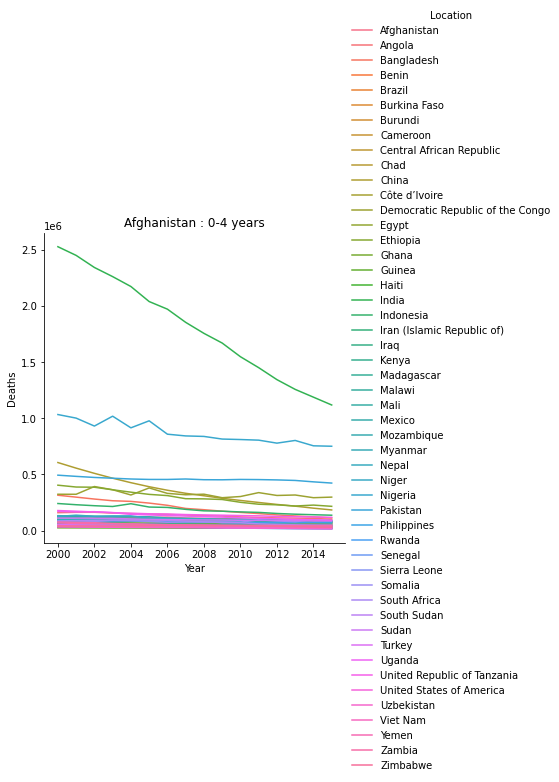

In [21]:
sns.relplot(x = "Year", y = "Deaths", hue = "Location", kind = "line", data = cmi).set(title=new_df_1_4_years.iloc[0]["Location"] 
                                                                                        + ' : ' + new_df_1_4_years.iloc[0]["AgeGroup"])

In [22]:
new_df_1_4_years.head()

,Location,Reason,Year,AgeGroup,Deaths,SpaceTime,Category
8,Afghanistan,HIV/AIDS,2015,0-4 years,17.0,AFG,3
11,Afghanistan,HIV/AIDS,2014,0-4 years,17.0,AFG,3
14,Afghanistan,HIV/AIDS,2013,0-4 years,18.0,AFG,3
17,Afghanistan,HIV/AIDS,2012,0-4 years,18.0,AFG,3
20,Afghanistan,HIV/AIDS,2011,0-4 years,18.0,AFG,3


In [23]:
melted_hce_data_filtered = melted_hce_data_filtered.rename(columns={"Country Name": "Location"})
melted_hce_data_filtered.head()

,Location,Year,HCE
0,Afghanistan,2000,15.803164
1,Angola,2000,12.998967
2,Burundi,2000,8.428346
3,Benin,2000,15.886879
4,Burkina Faso,2000,7.525643


In [24]:
print(melted_hce_data_filtered.dtypes)
melted_hce_data_filtered = melted_hce_data_filtered.astype({'Year': 'int64'})
print(melted_hce_data_filtered.dtypes)

Location     object
Year         object
HCE         float64
dtype: object
Location     object
Year          int64
HCE         float64
dtype: object


In [25]:
dataset_final = dataset_final[dataset_final.AgeGroup =='0-4 years']
grouped_cmi = dataset_final.groupby(['Location','Year'], as_index=False).sum()
grouped_cmi.head(10)

,Location,Year,Deaths
0,Afghanistan,2000,126578.92
1,Afghanistan,2001,131386.92
2,Afghanistan,2002,124658.00
3,Afghanistan,2003,117839.10
4,Afghanistan,2004,117196.50
5,Afghanistan,2005,117360.00
6,Afghanistan,2006,120168.00
7,Afghanistan,2007,112389.00
8,Afghanistan,2008,109295.00
9,Afghanistan,2009,108029.00


In [26]:
cmi_hce = pd.merge(grouped_cmi, melted_hce_data_filtered, how = 'inner', on = ['Location', 'Year'], suffixes=('_left', '_right'))
print(cmi_hce)

        Location  Year     Deaths        HCE
0    Afghanistan  2000  126578.92  15.803164
1    Afghanistan  2001  131386.92  15.803164
2    Afghanistan  2002  124658.00  15.803164
3    Afghanistan  2003  117839.10  17.035744
4    Afghanistan  2004  117196.50  20.412764
..           ...   ...        ...        ...
731       Zambia  2011   45223.00  57.880146
732       Zambia  2012   43547.80  69.295303
733       Zambia  2013   41174.22  88.128204
734       Zambia  2014   39983.00  67.496788
735       Zambia  2015   38971.40  59.337643

[736 rows x 4 columns]


In [27]:
afg = cmi_hce[cmi_hce.Location == 'Afghanistan']
afg

,Location,Year,Deaths,HCE
0,Afghanistan,2000,126578.92,15.803164
1,Afghanistan,2001,131386.92,15.803164
2,Afghanistan,2002,124658.00,15.803164
3,Afghanistan,2003,117839.10,17.035744
4,Afghanistan,2004,117196.50,20.412764
5,Afghanistan,2005,117360.00,23.890501
6,Afghanistan,2006,120168.00,27.836571
7,Afghanistan,2007,112389.00,31.271839
8,Afghanistan,2008,109295.00,38.102661
9,Afghanistan,2009,108029.00,41.722744


In [28]:
# Convert to xlsx
cmi_hce.to_excel("cmi_hce.xlsx")

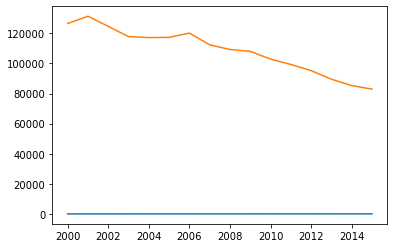

In [29]:
x = afg.Year
y = afg.HCE
plt.plot(x, y)

x1 = afg.Year
y1 = afg.Deaths
plt.plot(x1, y1)

In [30]:
# Split the data to apply ML models for predicting the number of Deaths
x,y = afg[['HCE', 'Year']], afg.Deaths;
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=56)
print(X_train, y_train)
print(X_test, y_test)

          HCE  Year
12  51.440262  2012
1   15.803164  2001
14  59.008934  2014
6   27.836571  2006
7   31.271839  2007
9   41.722744  2009
10  44.990532  2010
11  50.853474  2011
2   15.803164  2002
0   15.803164  2000
4   20.412764  2004
5   23.890501  2005 12     95248.00
1     131386.92
14     85306.30
6     120168.00
7     112389.00
9     108029.00
10    102919.00
11     99331.00
2     124658.00
0     126578.92
4     117196.50
5     117360.00
Name: Deaths, dtype: float64
          HCE  Year
8   38.102661  2008
13  55.034630  2013
15  58.906528  2015
3   17.035744  2003 8     109295.0
13     89519.4
15     82957.0
3     117839.1
Name: Deaths, dtype: float64


In [31]:
# Apply Decision Tree & AdaBoost Regressor

regressor = DecisionTreeRegressor(max_depth = 3, criterion = "friedman_mse", random_state = 0) 
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3, criterion = "friedman_mse"),
                           n_estimators=72, random_state=0)

# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                       max_depth=3),
                  n_estimators=72, random_state=0)

In [32]:
y_pred = regressor.predict(X_test)

# Results of Decision Tree Regressor
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 4497.7
Mean squared error = 23601575.42
Median absolute error = 4411.3
Explain variance score = 0.98
R2 score = 0.88


In [33]:
y_pred2 = regr_2.predict(X_test)

# Results of AdaBoost Regressor
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred2), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred2), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred2), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred2), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred2), 2))

Mean absolute error = 3952.7
Mean squared error = 21417215.42
Median absolute error = 4038.95
Explain variance score = 0.97
R2 score = 0.89
